<a href="https://colab.research.google.com/github/MMonirHossain/TransferLearningModel/blob/main/CNN%2BDENSENET%2BVGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import os
import cv2
import matplotlib.pyplot as plt

Mounted at /content/drive


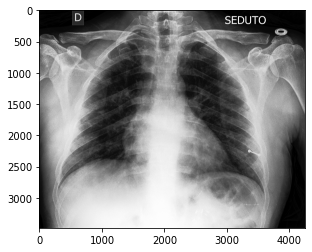

In [ ]:
image_dir=('/content/drive/MyDrive/Covid19-dataset/train/Covid/01.jpeg')
image=cv2.imread(image_dir)
plt.imshow(image)

In [ ]:
print(image.shape)

(3480, 4248, 3)


**1. Resizing Image**

(250, 250, 3)


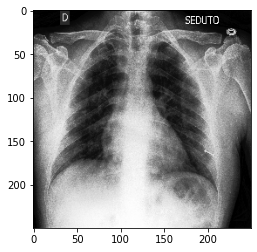

In [ ]:
resized_image=cv2.resize(image,(250,250))
print(resized_image.shape)
plt.imshow(resized_image)

**2.Rescaling**

Data Type: uint8
MIn: 0
Max: 255
Min: 0.000, Max: 1.000


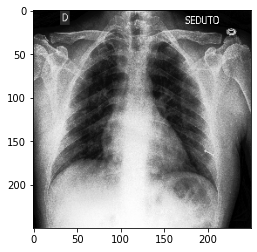

In [ ]:
#confirm the pixel range
import numpy as np

print('Data Type:',  resized_image.dtype)
print('MIn:',  resized_image.min())
print('Max:',  resized_image.max())
pixels = np.asarray(resized_image)
#convert from integer to float
pixels = pixels.astype('float32')
#normalize the range
pixels = pixels/255.0
#confirm the normalization
print('Min: %.3f, Max: %.3f' % (pixels.min(),pixels.max()))
plt.imshow(pixels)

**3. Applying Filtering Method**

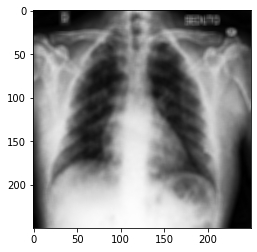

In [ ]:
Blur=cv2.blur(pixels,(5,5))
plt.imshow(Blur)

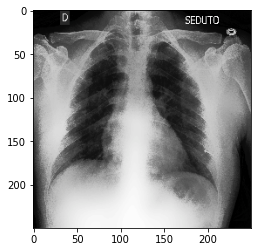

In [ ]:
noiseless_image = cv2.fastNlMeansDenoisingColored(resized_image, None, 20, 20, 1, 21)
plt.imshow(cv2.cvtColor(noiseless_image, cv2.COLOR_BGR2RGB))

** LAb-02Start-26-12-2022**

**3. Generate test and validation set**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir=('/content/drive/MyDrive/Covid19-dataset/train')
test_dir=('/content/drive/MyDrive/Covid19-dataset/test')
val_dir=('/content/drive/MyDrive/Covid19-dataset/test')

generator_train=ImageDataGenerator(
    rescale=1./255,
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=0,
    zoom_range=0,
    width_shift_range=0,
    height_shift_range=0,
    horizontal_flip=True,
    vertical_flip=False,
)

generator_test=ImageDataGenerator(
    rescale=1./255,
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=0,
    zoom_range=0,
    width_shift_range=0,
    height_shift_range=0,
    horizontal_flip=True,
    vertical_flip=False,
)

#train_ds=generator_train.flow_from_directory(train_dir,target_size=(64,64),batch_size=32,class_mode="categorical",color_mode='grayscale')
#test_ds=generator_test.flow_from_directory(test_dir,target_size=(64,64),batch_size=32,class_mode="categorical",color_mode='grayscale')


train_ds=generator_train.flow_from_directory(train_dir,target_size=(64,64),batch_size=32,class_mode="categorical",color_mode='rgb')
test_ds=generator_test.flow_from_directory(test_dir,target_size=(64,64),batch_size=32,class_mode="categorical",color_mode='rgb')


Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


**4 Create dataset**

In [ ]:
import tensorflow as tf;

batch_size=32
img_height=64
img_width=64
data_dir=('/content/drive/MyDrive/Covid19-dataset/test')

In [ ]:
from tensorflow.python.ops.gen_batch_ops import batch
training_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

validate_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

class_names=training_ds.class_names
print(class_names)
class_names=validate_ds.class_names
print(class_names)

Found 317 files belonging to 2 classes.
Using 254 files for training.
Found 317 files belonging to 2 classes.
Using 63 files for validation.
['test', 'train']
['test', 'train']


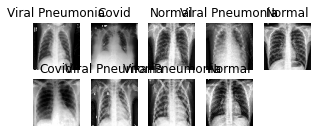

In [ ]:
plt.figure(figsize=(5, 5))
  
for images, labels in training_ds.take(1):
    for i in range(9):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

**Lab 3-9/1/2023**

**4. CNN model creating**
Created with some layer,so called sequnetial model.

**First Try**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(7,7),activation='relu',input_shape=(64,64,3),padding='same' ),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(1,activation='softmax')
])

In [ ]:
from keras.api._v2.keras import metrics
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics='categorical_accuracy')

In [ ]:
import keras
callback=keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)


In [ ]:
model.fit(training_ds,epochs=5,validation_data=validate_ds,callbacks=callback)

Epoch 1/5
8/8 [==============================] - 54s 1s/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 2/5
8/8 [==============================] - 5s 200ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 3/5
8/8 [==============================] - 6s 174ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000
Epoch 4/5
8/8 [==============================] - 4s 144ms/step - loss: 0.0000e+00 - categorical_accuracy: 1.0000 - val_loss: 0.0000e+00 - val_categorical_accuracy: 1.0000


**Second Try**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.optimizers import Adam

In [ ]:
from keras.optimizers.optimizer_v1 import Optimizer
model3=Sequential()
model3.add(Conv2D(64,(7,7),input_shape=(64,64,3),padding='same',activation='relu'))
model3.add(Flatten())
model3.add(Dense(units=128,activation='relu'))
model3.add(Dense(units=3,activation='softmax'))
optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.001,decay=0.0001,clipvalue=0.5)
model3.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics='categorical_accuracy')


In [ ]:
history3=model3.fit(train_ds,epochs=5,validation_data=test_ds)

Epoch 1/5
8/8 [==============================] - 14s 2s/step - loss: 4.6764 - categorical_accuracy: 0.4622 - val_loss: 1.0681 - val_categorical_accuracy: 0.6212
Epoch 2/5
8/8 [==============================] - 13s 2s/step - loss: 0.8233 - categorical_accuracy: 0.7291 - val_loss: 0.9072 - val_categorical_accuracy: 0.5455
Epoch 3/5
8/8 [==============================] - 13s 2s/step - loss: 0.4703 - categorical_accuracy: 0.7888 - val_loss: 0.6840 - val_categorical_accuracy: 0.6818
Epoch 4/5
8/8 [==============================] - 12s 2s/step - loss: 0.2764 - categorical_accuracy: 0.9004 - val_loss: 0.4165 - val_categorical_accuracy: 0.8333
Epoch 5/5
8/8 [==============================] - 12s 2s/step - loss: 0.1553 - categorical_accuracy: 0.9721 - val_loss: 0.3029 - val_categorical_accuracy: 0.9394


**LAB-04::23-01-2023**

In [ ]:
pretrained_model=tf.keras.applications.DenseNet201(input_shape=(64,64,3), include_top=False, weights='imagenet', pooling='avg')
pretrained_model.trainable=False                                                   

74836368/74836368 [==============================] - 4s 0us/step


In [ ]:
inputs3=pretrained_model.input
x3=tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
outputs3=tf.keras.layers.Dense(3,activation='softmax')(x3)
model4=tf.keras.Model(inputs=inputs3,outputs=outputs3)

In [ ]:
model4.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history4=model4.fit(train_ds,epochs=5,validation_data=test_ds)
#history=model.fit(datagen.flow(trainx,trainy,batch_size=32), validation_data=(testx,testy),epochs=20)

Epoch 1/5
8/8 [==============================] - 31s 2s/step - loss: 1.2502 - accuracy: 0.6813 - val_loss: 0.7069 - val_accuracy: 0.7879
Epoch 2/5
8/8 [==============================] - 13s 2s/step - loss: 0.4126 - accuracy: 0.8924 - val_loss: 0.6720 - val_accuracy: 0.7576
Epoch 3/5
8/8 [==============================] - 13s 2s/step - loss: 0.2775 - accuracy: 0.9203 - val_loss: 0.6350 - val_accuracy: 0.7576
Epoch 4/5
8/8 [==============================] - 13s 2s/step - loss: 0.1048 - accuracy: 0.9681 - val_loss: 0.4912 - val_accuracy: 0.8485
Epoch 5/5
8/8 [==============================] - 13s 2s/step - loss: 0.0716 - accuracy: 0.9841 - val_loss: 0.5193 - val_accuracy: 0.8182


**Home Work! After Lab 4::VGG19 Model applying**

In [ ]:
vgg19 = keras.applications.vgg19
vgg_model5 = vgg19.VGG19(weights='imagenet', include_top=False, input_shape=(64,64,3))
for layer in vgg_model5.layers: 
    layer.trainable = False
x = keras.layers.Flatten()(vgg_model5.output)
x = keras.layers.Dense(100, activation='relu')(x)
x = keras.layers.Dense(100, activation='relu')(x)
x = keras.layers.Dense(100, activation='relu')(x)
predictions = keras.layers.Dense(3, activation='softmax')(x)
model5 = keras.models.Model(inputs=vgg_model5.input, outputs=predictions)
#full_model.summary()

80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
model5.compile(loss='categorical_crossentropy',optimizer=keras.optimizers.Adamax(learning_rate=0.001),metrics=['accuracy'])
#history5 = model5.fit_generator( train_dataset, validation_data = val_dataset,   workers=10,  epochs=5,)

In [ ]:
history5=model5.fit(train_ds,epochs=50,validation_data=test_ds)

Epoch 1/50
8/8 [==============================] - 13s 2s/step - loss: 0.1253 - accuracy: 0.9641 - val_loss: 0.1624 - val_accuracy: 0.9545
Epoch 2/50
8/8 [==============================] - 12s 2s/step - loss: 0.1081 - accuracy: 0.9721 - val_loss: 0.1772 - val_accuracy: 0.9545
Epoch 3/50
8/8 [==============================] - 12s 2s/step - loss: 0.0902 - accuracy: 0.9841 - val_loss: 0.1300 - val_accuracy: 0.9242
Epoch 4/50
8/8 [==============================] - 12s 2s/step - loss: 0.1026 - accuracy: 0.9641 - val_loss: 0.1657 - val_accuracy: 0.9545
Epoch 5/50
8/8 [==============================] - 12s 2s/step - loss: 0.0882 - accuracy: 0.9761 - val_loss: 0.1305 - val_accuracy: 0.9242
Epoch 6/50
8/8 [==============================] - 12s 2s/step - loss: 0.1008 - accuracy: 0.9841 - val_loss: 0.1824 - val_accuracy: 0.9394
Epoch 7/50
8/8 [==============================] - 13s 2s/step - loss: 0.0835 - accuracy: 0.9761 - val_loss: 0.1505 - val_accuracy: 0.9394
Epoch 8/50
8/8 [==================

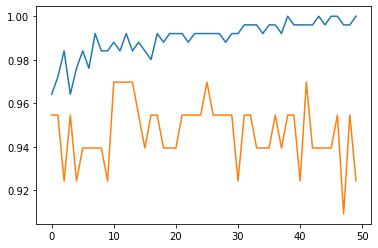

In [ ]:
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])

**LAB-05:13:02:2022**

In [ ]:
import numpy as np
predict=np.argmax(model5.predict(test_ds),axis=1)
predict

3/3 [==============================] - 2s 572ms/step


array([1, 2, 0, 0, 0, 2, 0, 0, 1, 0, 1, 0, 2, 1, 0, 0, 2, 1, 1, 0, 2, 1,
       0, 2, 1, 0, 0, 0, 2, 2, 1, 2, 2, 2, 1, 1, 0, 2, 0, 2, 0, 2, 1, 1,
       0, 1, 2, 0, 2, 0, 1, 0, 1, 0, 2, 0, 2, 0, 0, 2, 1, 0, 1, 2, 1, 2])

In [ ]:
vall_loss, val_acc= model5.evaluate(test_ds,verbose=0)
print(vall_loss, val_acc)

0.1546570062637329 0.9242424368858337


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
#code by teacher to print confusion matrix
predY=model5.predict(test_ds)
y_pred=np.argmax(predY,axis=1)
#y_actual=np.argmax(y_rest,axis=1)
#y_actual=np.concatenate([y for x,y in test_ds],axis=0)
#cm=confusion_matrix(y_actual,y_pred.l)
cm=confusion_matrix(y_pred,test_ds.labels)
print(cm)
#cm=confusion_matrix(test_ds.labels,y_pred)
#print(cm)

3/3 [==============================] - 1s 371ms/step
[[12  6  8]
 [ 7  8  4]
 [ 7  6  8]]


**LAB-06:27:02:2023**

In [ ]:
#code by teacher to print confusion matrix
#predYY=model5.predict(test_ds)
#print(predYY)
#y_pred=np.argmax(predY,axis=1)
#print(y_pred)
#y_actual=np.argmax(y_rest,axis=1)
#y_actual=np.concatenate([y for x,y in test_ds],axis=0)
#cm=confusion_matrix(y_actual,y_pred.l)
#cm1=confusion_matrix(predYY,test_ds.labels)
#print(cm1)
#cm=confusion_matrix(test_ds.labels,y_pred)
#print(cm)